Forecasting with Holt-Winter method
This method is another name of Triple Exponential Smoothing. It takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

I am using same Sales Data of Furnitures. The main objective here is to divide the dataset into 2 parts namely train and test section and then evaluate the performance of the model.

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
df =pd.read_excel("Data/Superstore_Sales_Records.xls", index_col='Order Date',parse_dates=True)
df=df[df["Category"]=="Furniture"]
df=df.groupby(by="Order Date").agg({"Sales":sum})
df.sort_index(inplace=True)
df.head(4)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1594/1232888476.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df=df.groupby(by="Order Date").agg({"Sales":sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


Change the resample frequency and make it monthly sales instead of daily

In [3]:
df=df.resample('MS').mean()

df.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


In [ ]:
#Train/test split-80:20

df.shape

(48, 1)

In [6]:
n=len(df)
m=int(n*0.8)

train_data=df.iloc[0:m]
test_data=df.iloc[m:n]

print(f"Total df size {len(df)}")
print(f"Total train data size {len(train_data)}")
print(f"Total test data size {len(test_data)}")

Total df size 48
Total train data size 38
Total test data size 10


In [7]:
train_data.tail()

,Sales
Order Date,
2016-10-01,624.872474
2016-11-01,1271.345152
2016-12-01,1410.719808
2017-01-01,397.602133
2017-02-01,528.179800


In [9]:
test_data

,Sales
Order Date,
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583
2017-10-01,875.362728
2017-11-01,1277.817759


In [10]:
#fitting the model 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model=ExponentialSmoothing(train_data['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [11]:
# Evaluating aganist test set 

test_prediction =fitted_model.forecast(len(test_data))

In [12]:
test_prediction

2017-03-01     751.363721
2017-04-01     685.457171
2017-05-01     584.215398
2017-06-01     646.029350
2017-07-01     703.944277
2017-08-01     627.291453
2017-09-01    1147.738928
2017-10-01     673.706910
2017-11-01    1171.484311
2017-12-01    1319.224611
Freq: MS, dtype: float64

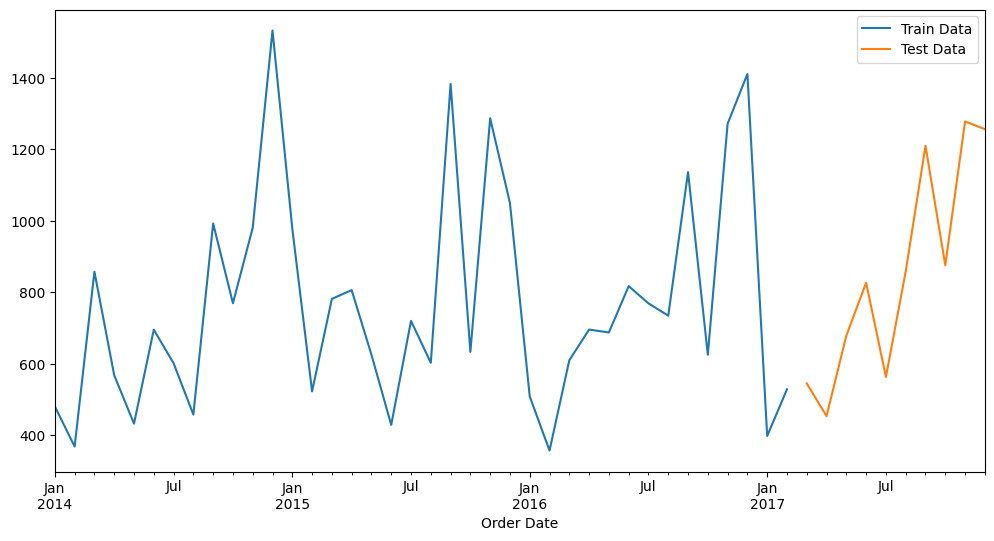

In [13]:
#plot train and test data 
train_data["Sales"].plot(legend=True, label="Train Data")
test_data["Sales"].plot(legend=True,label="Test Data",figsize=(12,6)).autoscale(axis="x",tight=True)


<Axes: xlabel='Order Date'>

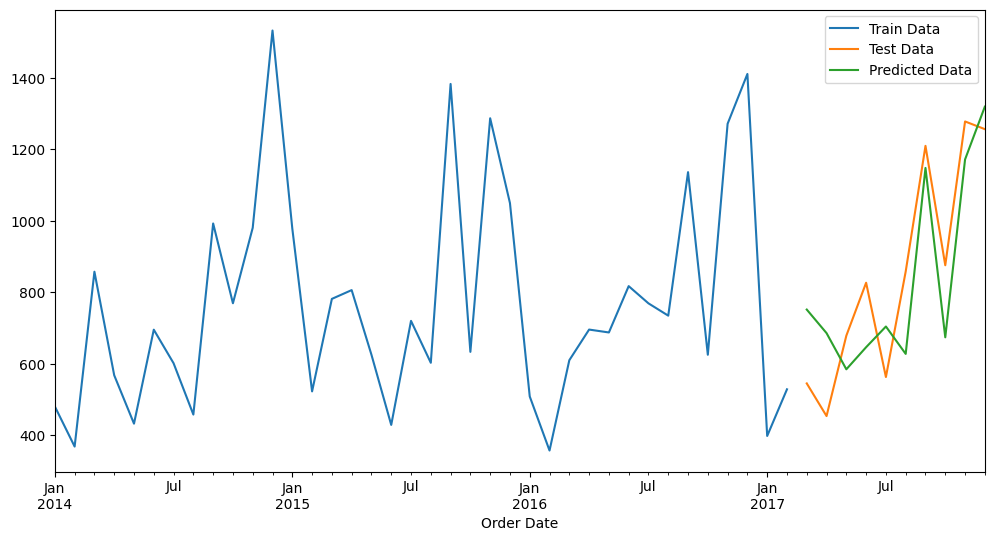

In [15]:
#plot train and test data and predicted value  
train_data["Sales"].plot(legend=True, label="Train Data")
test_data["Sales"].plot(legend=True,label="Test Data",figsize=(12,6)).autoscale(axis="x",tight=True)
test_prediction.plot(legend=True, label="Predicted Data")

Evaluation metrics 

Since this is a type of regression problem we can use regression metrics like Mean Squared Error(MSE) or Root Mean Squared Error(RMSE) or Mean Absolute Error(MAE)


In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
mae_error = mean_absolute_error(test_data, test_prediction)

print(f"Mean absolute error of the above model is {mae_error}")

Mean absolute error of the above model is 151.80633339174736


In [19]:
mse_error = mean_squared_error(test_data, test_prediction)

print(f"Mean squared error of the above model is {mse_error}")

Mean squared error of the above model is 27094.540466541326


In [20]:
rmse_error = np.sqrt(mean_squared_error(test_data, test_prediction))

print(f"Root mean squared error of the above model is {rmse_error}")

Root mean squared error of the above model is 164.6041933443414


Forecast in future
We evaluated the model by training on train data and testing it on the unknown points to the model. In this section we will see how model's forecast looks on future points which is not even in our test set.

We will train the model on whole dataset and then will try to predict on furure points.

In [21]:
fitted_model=ExponentialSmoothing(df["Sales"],trend="mul",seasonal="mul",seasonal_periods=12).fit()

In [22]:
future_prediction = fitted_model.forecast(12)

In [23]:
future_prediction

2018-01-01     620.869957
2018-02-01     480.968381
2018-03-01     769.204749
2018-04-01     677.107416
2018-05-01     644.979439
2018-06-01     704.020038
2018-07-01     698.469516
2018-08-01     723.854561
2018-09-01    1220.263127
2018-10-01     767.774709
2018-11-01    1244.271812
2018-12-01    1349.945303
Freq: MS, dtype: float64

<Axes: xlabel='Order Date'>

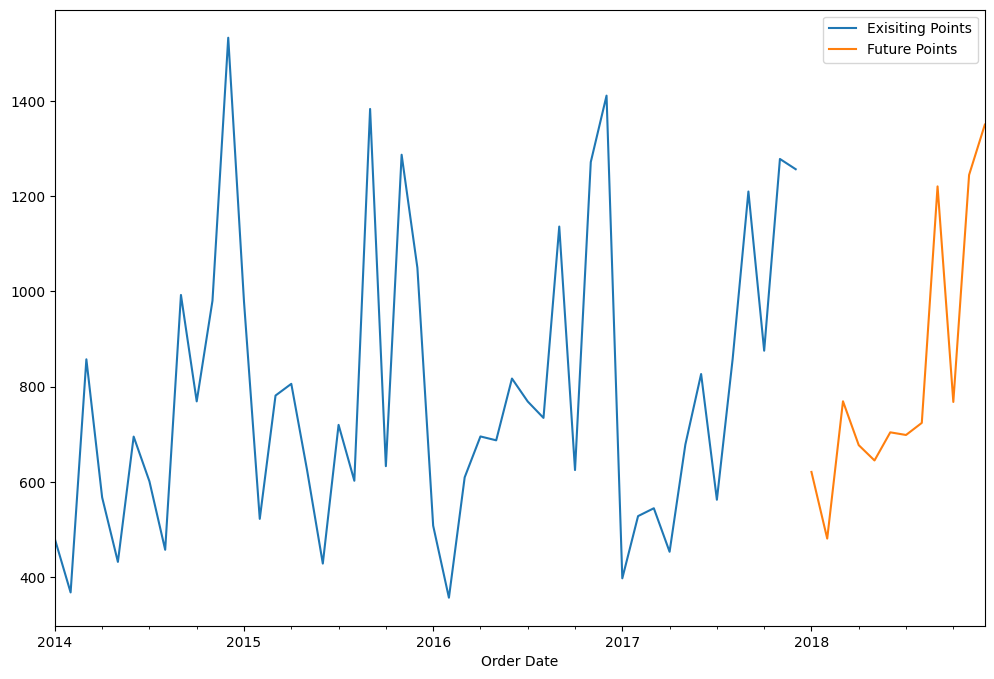

In [24]:
df["Sales"].plot(figsize=(12,8),legend=True,label="Exisiting Points")
future_prediction.plot(figsize=(12,8),legend=True,label="Future Points")

Time series Stationarity and Differencing

Stationarity
Time series said to be stationary if it does not exhibit trends or seasonality i.e fluctuations in the data are entirely due to outside factors and noises

Example:

Samples.csv file contains some dummy data and we can use it to illustrate satationarity.

In [25]:
df=pd.read_csv("Data/samples.csv", index_col=0, parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


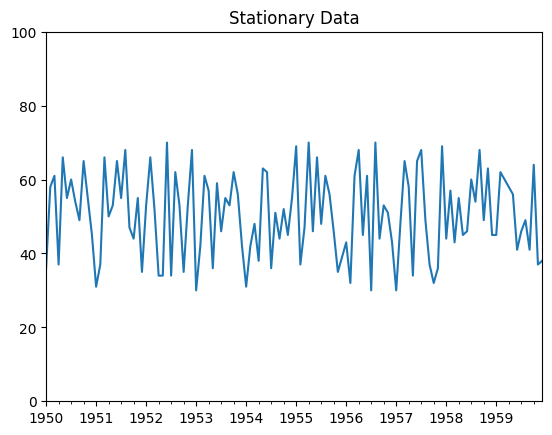

In [26]:
df['a'].plot(ylim=[0,100],title="Stationary Data").autoscale(axis='x',tight=True)


check moving  average attribute for a 

<Axes: title={'center': 'Moving Average'}>

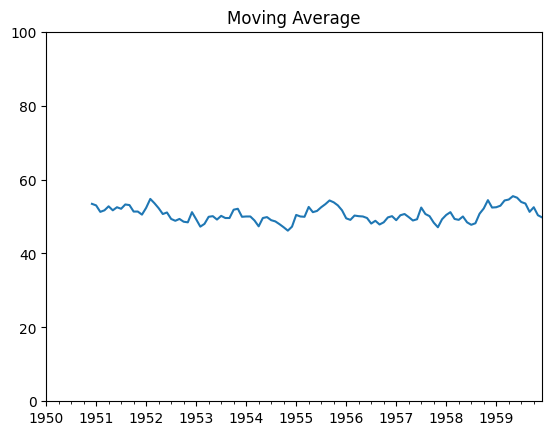

In [27]:
df['a_ma']=df['a'].rolling(12).mean()

df['a_ma'].plot(ylim=[0,100],title="Moving Average")

Mean seems have a nearly constant value 

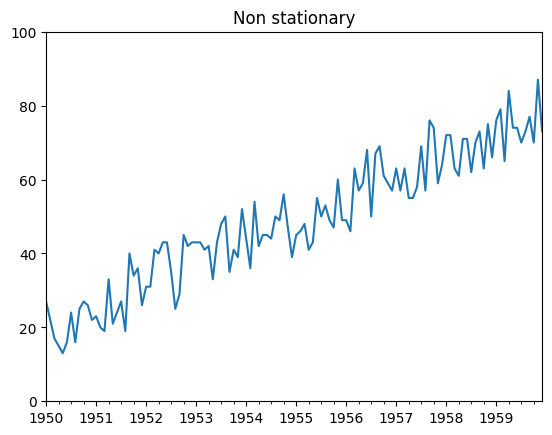

In [30]:
#Non stationary data 

df['b'].plot(ylim=[0,100],title="Non stationary").autoscale(axis='x',tight=True)

<Axes: title={'center': 'Moving average'}>

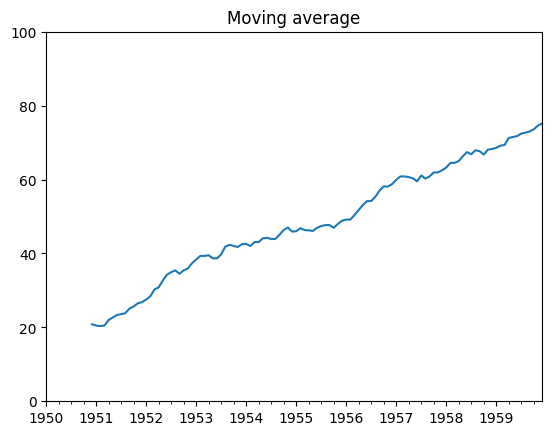

In [31]:
# calculate the moving average with window size 12.

df['b_ma']=df['b'].rolling(12).mean()
df['b_ma'].plot(ylim=[0,100],title="Moving average") 

Mean does not seem same between two equidistance time stamp 

Differencing
Non-stationary data can be made to look stationary through differencing. A simple differencing method calculates the difference between consecutive points.

Related Functions:
statespace.tools.diff(series[, k_diff, …])  Difference a series simply and/or seasonally along the zero-th axis.

In [32]:
from statsmodels.tsa.statespace.tools import diff

df['d1']=diff(df['b'],k_diff=1)



In [34]:
df.head(10)

,a,b,c,d,a_ma,b_ma,d1
1950-01-01,36,27,0,67,NaN,NaN,NaN
1950-02-01,58,22,3,31,NaN,NaN,-5.0
1950-03-01,61,17,5,67,NaN,NaN,-5.0
1950-04-01,37,15,8,47,NaN,NaN,-2.0
1950-05-01,66,13,8,62,NaN,NaN,-2.0
1950-06-01,55,16,19,60,NaN,NaN,3.0
1950-07-01,60,24,24,53,NaN,NaN,8.0
1950-08-01,54,16,33,71,NaN,NaN,-8.0
1950-09-01,49,25,44,63,NaN,NaN,9.0
1950-10-01,65,27,60,46,NaN,NaN,2.0


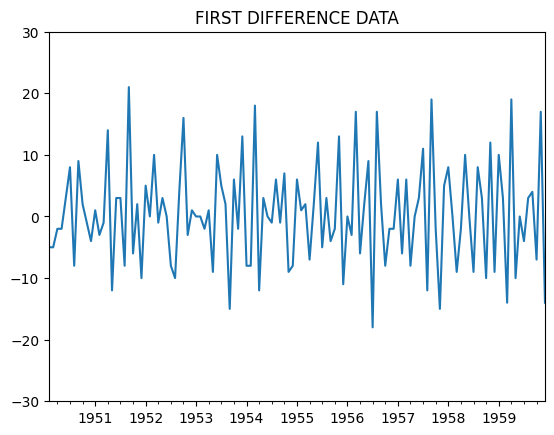

In [35]:
df['d1'].plot(title="FIRST DIFFERENCE DATA", ylim=[-30, 30]).autoscale(axis='x',tight=True)

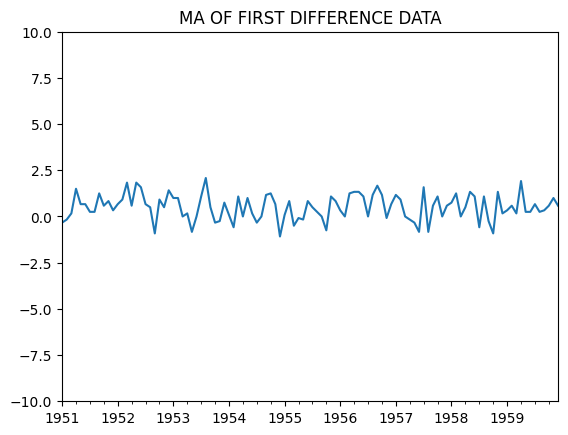

In [36]:
#lets check the moving average for this series.

df['d1_ma']=df['d1'].rolling(12).mean()
df['d1_ma'].plot(title="MA OF FIRST DIFFERENCE DATA", ylim=[-10, 10]).autoscale(axis='x',tight=True)
